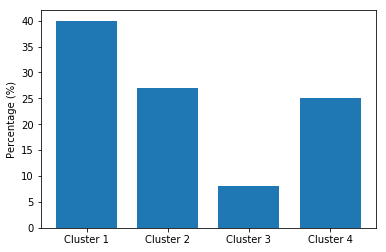

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

plt.bar([1,3,5,7],[40,27,8,25], width=1.5)
plt.xticks([1,3,5,7],['Cluster 1','Cluster 2','Cluster 3', 'Cluster 4'])
plt.ylabel('Percentage (%)')
plt.savefig('panss_sum_kmeans_percentage.png',dpi=300)

[[27.01706485 16.01023891]
 [12.06918239 28.47798742]
 [13.14256198 13.64876033]
 [33.59405941 35.07920792]]


'\nfig.savefig("panss_sum_kmeans.png", dpi=300)\n'

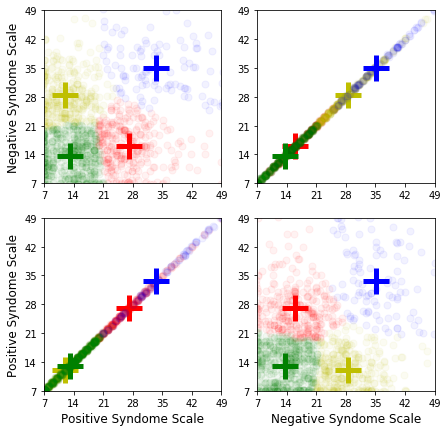

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import cluster, metrics

#读取csv数据
def read_data(path):
	data = pd.read_csv(path)
	#数据全部转换为float64
	data = data.astype('float64')
	return data

#定位缺失值
def find_null(data):
    for columname in data.columns:
        if data[columname].count() != len(data):
            loc = data[columname][data[columname].isnull().values==True].index.tolist()
            print(columname, loc)
    return

panss_sum = read_data('panss_sum.csv')

find_null(panss_sum)

#以中位数替换缺失值
def fill_null(data, fill_null_with='median'):
	imp = Imputer(missing_values='NaN', strategy = fill_null_with, axis=0)
	imp.fit(data)
	Imputer(axis=0, copy=True, missing_values='NaN', strategy=fill_null_with, verbose=0)
	data_imputed = imp.transform(data)
	return data_imputed

panss_sum_imputed = fill_null(panss_sum)


#标准化数据进行后续操作
panss_sum_imputed_mean = np.mean(panss_sum_imputed, axis=0)
panss_sum_imputed_std = np.std(panss_sum_imputed, axis=0)
panss_sum_imputed_standardized = preprocessing.scale(panss_sum_imputed)

#进行KMean

kmeans_fit = cluster.KMeans(n_clusters = 4).fit(panss_sum_imputed_standardized)
cluster_labels = kmeans_fit.labels_
cluster_centers = kmeans_fit.cluster_centers_

cluster_centers_not_imputed=cluster_centers * panss_sum_imputed_std+panss_sum_imputed_mean

print cluster_centers_not_imputed


from collections import Counter
Counter(cluster_labels)


import seaborn as sns

panss_sum_imputed_with_label = pd.DataFrame(panss_sum_imputed, columns=panss_sum.columns)
panss_sum_imputed_with_label['label'] = cluster_labels

golden = '#fac205'
blue = '#a2cffe'
red = 'salmon'
green = '#02ab2e'

colors = [golden, blue, red, green]

'''
0-r-4
1-y-2
2-g-1
3-b-3
'''

fig = plt.figure()
fig.set_size_inches(7,7)
ax = plt.subplot(111)
for k in range(4):
    sns.regplot(x=panss_sum.columns[0], y=panss_sum.columns[1], 
                data=panss_sum_imputed_with_label[panss_sum_imputed_with_label['label']==k], 
                fit_reg=False, x_jitter = 0.3, y_jitter=0.3, marker='o', color=colors[k], scatter_kws={'s':50, 'alpha':0.05})
    plt.scatter(cluster_centers_not_imputed[k,0],cluster_centers_not_imputed[k,1],color=colors[k], marker='+', s=700,linewidth=5)

ax.set_xlabel('Positive Syndome Scale', fontsize=12)
ax.set_ylabel('Negative Syndome Scale', fontsize=12)
ax.set_xticks(np.linspace(7,49,7))
ax.set_yticks(np.linspace(7,49,7))
ax.set_xlim(7,49)
ax.set_ylim(7,49)
        
'''
fig.savefig("panss_sum_kmeans.png", dpi=300)
'''


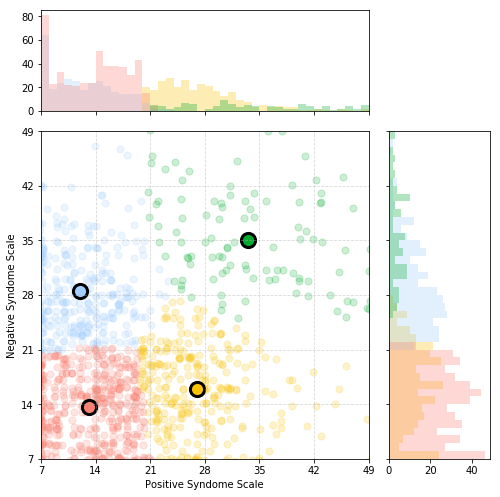

In [65]:
from matplotlib.ticker import NullFormatter

golden = '#fac205'
blue = '#a2cffe'
red = 'salmon'
green = '#02ab2e'

colors = [golden, blue, red, green]

'''
0-r-3
1-y-1
2-g-0
3-b-2
'''

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.04

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

nullfmt = NullFormatter() 

plt.figure(figsize=(7,7))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.grid(True, alpha=0.5, linestyle='--')

for k in range(4):
    sns.regplot(x=panss_sum.columns[0], y=panss_sum.columns[1], 
                data=panss_sum_imputed_with_label[panss_sum_imputed_with_label['label']==k], 
                fit_reg=False, x_jitter = 0.3, y_jitter=0.3, marker='o', 
                color=colors[k], scatter_kws={'s':50, 'alpha':0.2}, ax=axScatter)
    axScatter.scatter(cluster_centers_not_imputed[k,0], cluster_centers_not_imputed[k,1], color=colors[k], 
                marker='o', edgecolors='black', s=200, linewidth=3)

axScatter.set_xlabel('Positive Syndome Scale')
axScatter.set_ylabel('Negative Syndome Scale')
axScatter.set_xticks(np.linspace(7,49,7))
axScatter.set_yticks(np.linspace(7,49,7))
axScatter.set_xlim(7,49)
axScatter.set_ylim(7,49)

for k in range(4):
    axHistx.hist(panss_sum_imputed_with_label[panss_sum_imputed_with_label['label']==k]['panss_p_sum'], 
                 range(6,50), facecolor=colors[k], alpha=0.3)
    axHisty.hist(panss_sum_imputed_with_label[panss_sum_imputed_with_label['label']==k]['panss_n_sum'], 
                 range(6,50), facecolor=colors[k], alpha=0.3, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
axHistx.set_xticks(axScatter.get_xticks())
axHisty.set_yticks(axScatter.get_yticks())

plt.savefig("panss_sum_kmeans_scatter.png", dpi=300)

In [67]:
pd.DataFrame(cluster_labels).to_csv('panss_sum_kmeans_label.csv')

In [68]:
print Counter(cluster_labels)

Counter({2: 484, 1: 318, 0: 293, 3: 101})


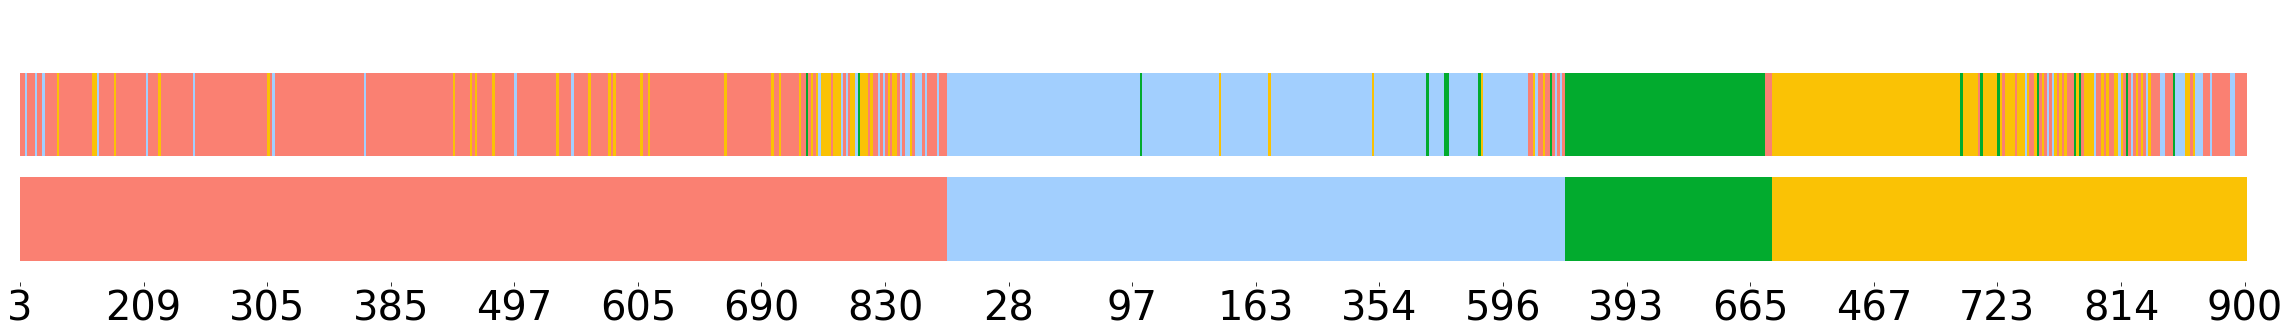

In [80]:
two_labels = pd.read_excel('comparison_between_pn_kmeans_and_sum_kmeans.xlsx')

import matplotlib.patches as patches

fig = plt.figure(figsize=(40,5))
ax = fig.add_subplot(111)

golden = '#fac205'
blue = '#a2cffe'
red = 'salmon'
green = '#02ab2e'

colors = [red, blue, green, golden]

for i in range(0,two_labels.shape[0]):
    ax.add_patch(patches.Rectangle((i, 0), 1, 2, fill=True, edgecolor=None, facecolor=colors[two_labels.iloc[i,1]]))
    ax.add_patch(patches.Rectangle((i, 2.5), 1, 2, fill=True, edgecolor=None, facecolor=colors[two_labels.iloc[i,2]]))

plt.xlim(-1,two_labels.shape[0]+1)
plt.ylim(-0.5,6)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([])
plt.xticks([0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850, 900],
           [two_labels.iloc[0,0], two_labels.iloc[50,0], two_labels.iloc[100,0], two_labels.iloc[150,0], two_labels.iloc[200,0], two_labels.iloc[250,0], 
            two_labels.iloc[300,0], two_labels.iloc[350,0], two_labels.iloc[400,0], two_labels.iloc[450,0], two_labels.iloc[500,0], two_labels.iloc[550,0], 
            two_labels.iloc[600,0], two_labels.iloc[650,0], two_labels.iloc[700,0], two_labels.iloc[750,0], two_labels.iloc[800,0], two_labels.iloc[850,0], two_labels.iloc[900,0]], 
           fontsize=40)

plt.savefig('comparison_between_pn_kmeans_and_sum_kmeans.png', dpi=300)